In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots, COLORMAPS
from collections import Counter
from matplotlib.lines import Line2D
from aging.organization.dataframes import load_male_long_df, load_female_long_df, DF_PATHS
from tqdm import tqdm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from operator import add
from tqdm.auto import tqdm
from functools import reduce
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import silhouette_score
from aging.plotting import format_plots, figure, save_factory, PlotConfig, legend, add_identity
from sklearn.cross_decomposition import PLSRegression

In [3]:
from matplotlib.colors import LinearSegmentedColormap
# Define the color map
colors = ['#d94801','white','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmmf=custom_cmap

In [4]:
cmm = COLORMAPS.ont_male
cmf = COLORMAPS.ont_female
m_df = load_male_long_df(average_weeks=True, merge_size=False, merge_ages=True, df_path=DF_PATHS.usage_male).groupby(['age','mouse']).mean()
f_df = load_female_long_df(average_weeks=True, merge_size=False, filter_female=True, merge_ages=True, df_path=DF_PATHS.usage_female).groupby(['age','mouse']).mean()

In [5]:
format_plots()

In [6]:
# look at syllable usage diff male and females according to actual age
diff_age_ont =m_df.groupby('age').mean().to_numpy()-f_df.groupby('age').mean().to_numpy()

In [7]:
a=diff_age_ont.sum(axis=0)
ind = np.argsort(-a)
data=diff_age_ont.T
data=data[ind]

Text(0.5, -0.9833333333333076, 'Chron. age (wks)')

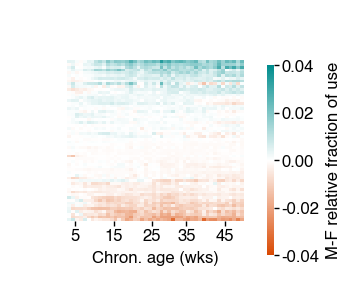

In [8]:
cg=sns.clustermap(
    data=data,
    cmap=cmmf, 
    figsize=(1.3, 1.3),
    #col_colors=color_mat,
    cbar_pos=(1.02, 0.025, 0.025, .73),
    col_cluster=False,
    row_cluster=False,
    #yticklabels=keep_syllables[ind],
    yticklabels=False,
    #xticklabels=False,
    cbar_kws={'label': 'M-F relative fraction of use'}, 
    vmax=0.04,
    vmin=-0.04,
)
# Set the x-axis tick labels to 'age' and show only 1 in every 10 values
data_labels = f_df.index.get_level_values('age').unique()
# Customize the x-axis ticks
ax = cg.ax_heatmap
# Desired tick labels
desired_ages = [5, 15, 25, 35, 45]
# Find the positions of the desired ages
tick_positions = [np.where(data_labels == age)[0][0] for age in desired_ages]
tick_labels = desired_ages

# Set x and y ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.set_xlabel('Chron. age (wks)')

In [9]:
c = PlotConfig()
cg.savefig(c.dana_save_path / "fig3"/ 'fvm_relative_syllable_usage_across_life_longv2.pdf')